In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
rms=[]
r2=[]


UNSCALED

In [27]:
X = df.drop('quality',axis=1)
y = df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:

y_pred = model.predict(X_test)
un_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
un_r2=r2_score(y_test,y_pred)
rms.append(un_rmse)
r2.append(un_r2)
un_rmse,un_r2

(0.6920188034463196, 0.33588957936031627)

MINMAX SCALER

In [50]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_X = pd.DataFrame(norm.fit_transform(X),columns=X.columns)
norm_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [31]:
X_train,X_test,y_train,y_test=train_test_split(norm_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
minmax_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
minmax_r2=r2_score(y_test,y_pred)
rms.append(minmax_rmse)
r2.append(minmax_r2)
minmax_rmse,minmax_r2

(0.6350769491903974, 0.37657218051340247)

STANDARD SCALER

In [32]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand_X = pd.DataFrame(stand.fit_transform(X),columns=X.columns)
stand_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [33]:
X_train,X_test,y_train,y_test=train_test_split(stand_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
stand_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
stand_r2=r2_score(y_test,y_pred)
rms.append(stand_rmse)
r2.append(stand_r2)
stand_rmse,stand_r2

(0.6837499075527305, 0.27790802509350443)

UNSCALED vs SCALED FEATURES

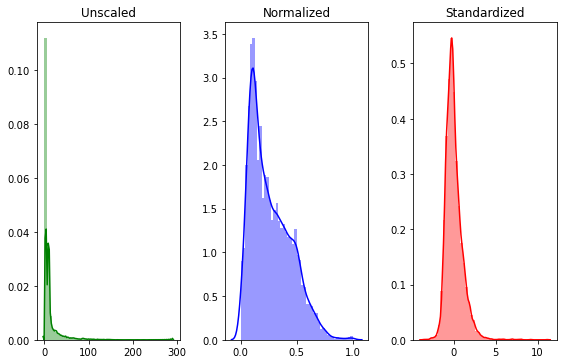

In [34]:
fig, ax=plt.subplots(1,3,figsize=(8,5))
fig.tight_layout()
sns.distplot(X, ax=ax[0], color='g')
ax[0].set_title("Unscaled")
sns.distplot(norm_X, ax=ax[1],color='b')
ax[1].set_title("Normalized")
sns.distplot(stand_X, ax=ax[2],color='r')
ax[2].set_title("Standardized")
plt.show()

MAX ABS SCALER

In [35]:
from sklearn.preprocessing import MaxAbsScaler
max_ab = MaxAbsScaler()
max_ab_X = pd.DataFrame(max_ab.fit_transform(X),columns=X.columns)
max_ab_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872


Text(0.5, 1.0, 'Max Abs')

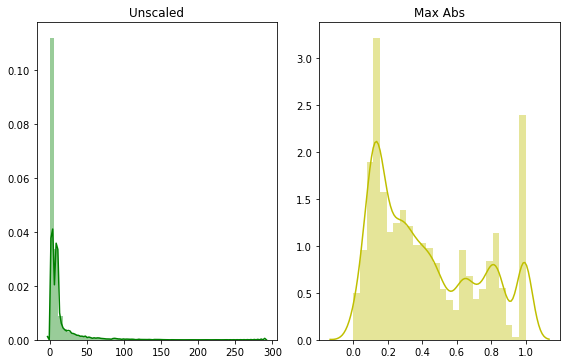

In [36]:
fig, ax=plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
sns.distplot(X, ax=ax[0], color='g')
ax[0].set_title("Unscaled")
sns.distplot(max_ab_X, ax=ax[1],color='y')
ax[1].set_title("Max Abs")

In [37]:
X_train,X_test,y_train,y_test=train_test_split(max_ab_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
max_ab_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
max_ab_r2=r2_score(y_test,y_pred)
rms.append(max_ab_rmse)
r2.append(max_ab_r2)
max_ab_rmse,max_ab_r2

(0.6485267632122467, 0.35391226605852233)

ROBUST SCALER

In [38]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
robust_X = pd.DataFrame(robust.fit_transform(X),columns=X.columns)
robust_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


Text(0.5, 1.0, 'Robust Scaler')

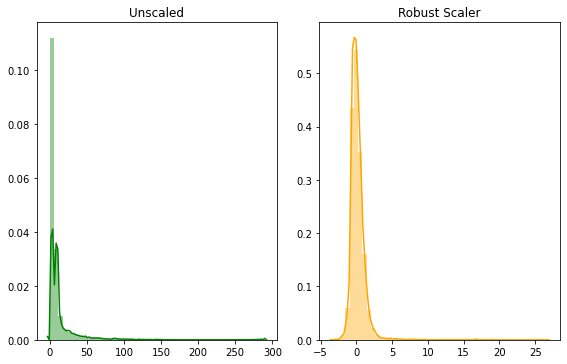

In [39]:
fig, ax=plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
sns.distplot(X, ax=ax[0], color='g')
ax[0].set_title("Unscaled")
sns.distplot(robust_X, ax=ax[1],color='orange')
ax[1].set_title("Robust Scaler")

In [40]:
X_train,X_test,y_train,y_test=train_test_split(robust_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
robust_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
robust_r2=r2_score(y_test,y_pred)
rms.append(robust_rmse)
r2.append(robust_r2)
robust_rmse,robust_r2

(0.6424286135243095, 0.35624001953709805)

QUANTILE TRANSFORMER

In [41]:
from sklearn.preprocessing import QuantileTransformer
qts = QuantileTransformer()
qts_X = pd.DataFrame(qts.fit_transform(X),columns=X.columns)
qts_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.345345,0.857357,0.000000,0.253253,0.395395,0.396897,0.449950,0.739239,0.899900,0.281281,0.153654
1,0.466967,0.963463,0.000000,0.753754,0.843844,0.813814,0.785786,0.506507,0.230230,0.662663,0.369870
2,0.466967,0.908408,0.162162,0.587087,0.771271,0.553554,0.690190,0.569069,0.360360,0.590591,0.369870
3,0.922923,0.061562,0.926927,0.253253,0.370871,0.634635,0.734234,0.777277,0.155656,0.355856,0.369870
4,0.345345,0.857357,0.000000,0.253253,0.395395,0.396897,0.449950,0.739239,0.899900,0.281281,0.153654


Text(0.5, 1.0, 'Quantile Tranformer')

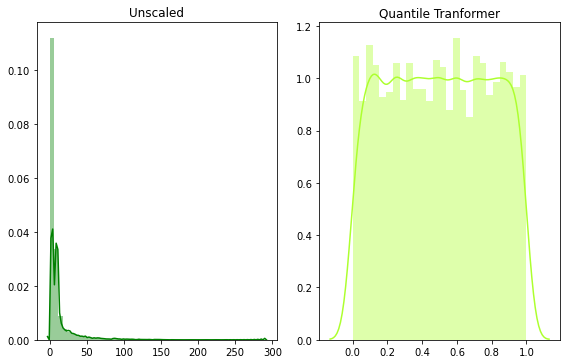

In [42]:

fig, ax=plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
sns.distplot(X, ax=ax[0], color='g')
ax[0].set_title("Unscaled")
sns.distplot(qts_X, ax=ax[1],color='greenyellow')
ax[1].set_title("Quantile Tranformer")

In [43]:
X_train,X_test,y_train,y_test=train_test_split(qts_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
qts_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
qts_r2=r2_score(y_test,y_pred)
rms.append(qts_rmse)
r2.append(qts_r2)
qts_rmse,qts_r2

(0.6422734456671076, 0.307976549221441)

POWER TRANSFORMER

In [44]:
from sklearn.preprocessing import PowerTransformer
pts = PowerTransformer()
pts_X = pd.DataFrame(pts.fit_transform(X),columns=X.columns)
pts_X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025


Text(0.5, 1.0, 'Power Tranformer')

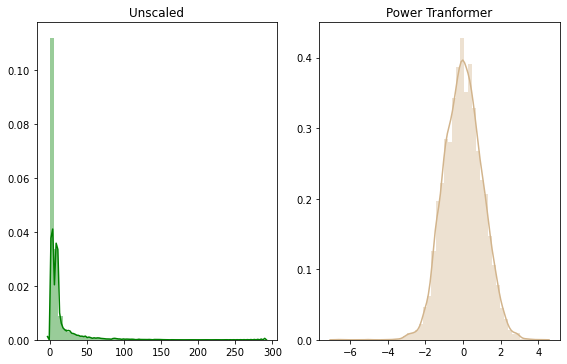

In [45]:

fig, ax=plt.subplots(1,2,figsize=(8,5))
fig.tight_layout()
sns.distplot(X, ax=ax[0], color='g')
ax[0].set_title("Unscaled")
sns.distplot(pts_X, ax=ax[1],color='tan')
ax[1].set_title("Power Tranformer")

In [46]:
X_train,X_test,y_train,y_test=train_test_split(pts_X,y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pts_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
pts_r2=r2_score(y_test,y_pred)
rms.append(pts_rmse)
r2.append(pts_r2)
pts_rmse,pts_r2

(0.6640684262153503, 0.325682365998498)

In [47]:
data = [rms,r2]
df1 = pd.DataFrame({'RMSE': rms,
                   'R2_Score': r2},
                   index = ['Unscaled','MinMax','Standard','Max Abs','Robust','Quantile Transformer','Power Transformer'])

In [48]:
df1

,RMSE,R2_Score
Unscaled,0.692019,0.335890
MinMax,0.635077,0.376572
Standard,0.683750,0.277908
Max Abs,0.648527,0.353912
Robust,0.642429,0.356240
Quantile Transformer,0.642273,0.307977
Power Transformer,0.664068,0.325682
